# **Data-Driven Insights for Solar Energy: Analysis, Findings, and Strategic Recommendations (Benin, Sierraleon and Togo)**

## **Business Overview**

MoonLight Energy Solutions aims to develop a strategic approach to significantlyenhance its operational efficiency and sustainability through targeted solarinvestments. As an Analytics Engineer at MoonLight Energy Solutions, my task is to perform a quick analysis of an environmental measurement provided bytheengineering team and translate your observation as a strategy report.

## **Understanding the Business Objective**

### **Why Analyze Solar Data?**

MoonLight Energy Solutions aims to **enhance operational efficiency and sustainability** by strategically investing in solar energy. Our primary objective is to:

- **Identify high-potential regions** for solar installations.
- **Analyze the impact of environmental factors** on solar panel performance.
- **Optimize maintenance strategies** to improve energy output.


### **Dataset Overview**  

The dataset contains solar radiation  measurements, weather conditions and their impact on solar energy generation. Each row represents a recorded observation at specific time with key variables related to solar irradiance, temperature, pressure, humidity,Precipitation, wind conditions, and sensor readings of radation,and temprature.  

#### **Key Variables:**  
- **Timestamp (yyyy-mm-dd hh:mm):** Date and time of each recorded observation.  
- **Solar Irradiance Metrics:**  
  - **GHI (W/m²):** Global Horizontal Irradiance—total solar radiation on a horizontal surface.  
  - **DNI (W/m²):** Direct Normal Irradiance—solar radiation received per unit area perpendicular to sunlight.  
  - **DHI (W/m²):** Diffuse Horizontal Irradiance—solar radiation received indirectly due to scattering.  
  - **ModA / ModB (W/m²):** Irradiance measurements from specific sensors or modules.  
- **Environmental Conditions:**  
  - **Tamb (°C):** Ambient temperature.  
  - **RH (%):** Relative humidity.  
  - **BP (hPa):** Barometric pressure.  
- **Wind Data:**  
  - **WS (m/s):** Wind speed.  
  - **WSgust (m/s):** Maximum wind gust speed.  
  - **WSstdev (m/s):** Standard deviation of wind speed (variability).  
  - **WD (°N):** Wind direction in degrees from north.  
  - **WDstdev:** Standard deviation of wind direction.  
- **Cleaning & Precipitation:**  
  - **Cleaning (1/0):** Indicates whether a cleaning event occurred.  
  - **Precipitation (mm/min):** Rainfall rate measured in millimeters per minute.  
- **Module Temperature:**  
  - **TModA / TModB (°C):** Temperatures of individual solar modules.  
- **Comments:** A column for additional observations or notes.  

This dataset serves as a foundation for analyzing solar energy potential, identifying trends, and optimizing maintenance strategies.


# **Environment Setup**
Before deep dive in to analysis of the data ,we neee to import all neccessary packages and modules.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

# **Data Loading**
we start analysis by loading dataset from the country


In [34]:
counries=['benin','sierraleone',"togo"]
def load_data(country: str)-> pd.DataFrame:
    """Loading the data from the processed csv file"""
    df = pd.read_csv(f"../data/processed/{country}_clean.csv")
    df['country'] = country
    print(f"Loaded {country} data with shape: {df.shape}")
    return df
# Load the data and merge into a single DataFrame
full_df=pd.concat([load_data(country) for country in counries],ignore_index=True)

print(" Shape of loaded data",full_df.shape)



Loaded benin data with shape: (491227, 20)
Loaded sierraleone data with shape: (405305, 20)
Loaded togo data with shape: (457796, 20)
 Shape of loaded data (1354328, 20)


**Metric comparsion**

    Metric Comparison Analysis

   Boxplots of GHI, DNI, DHI by Country 


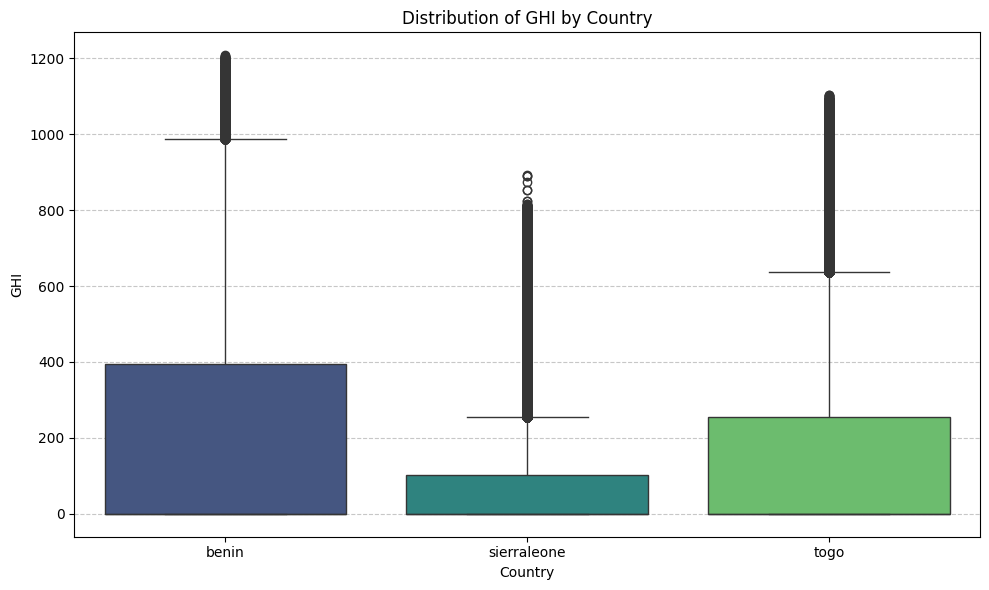

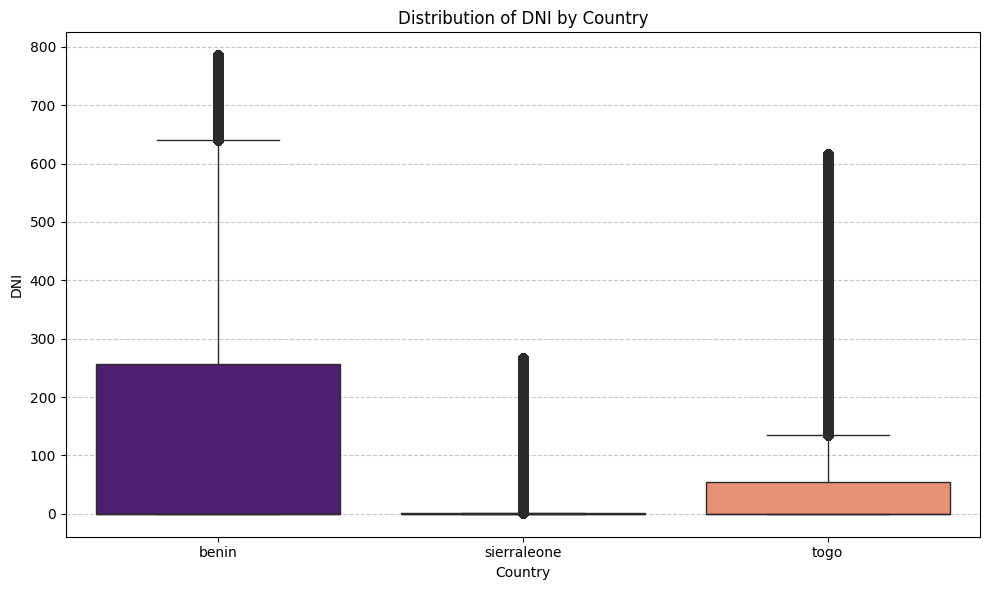

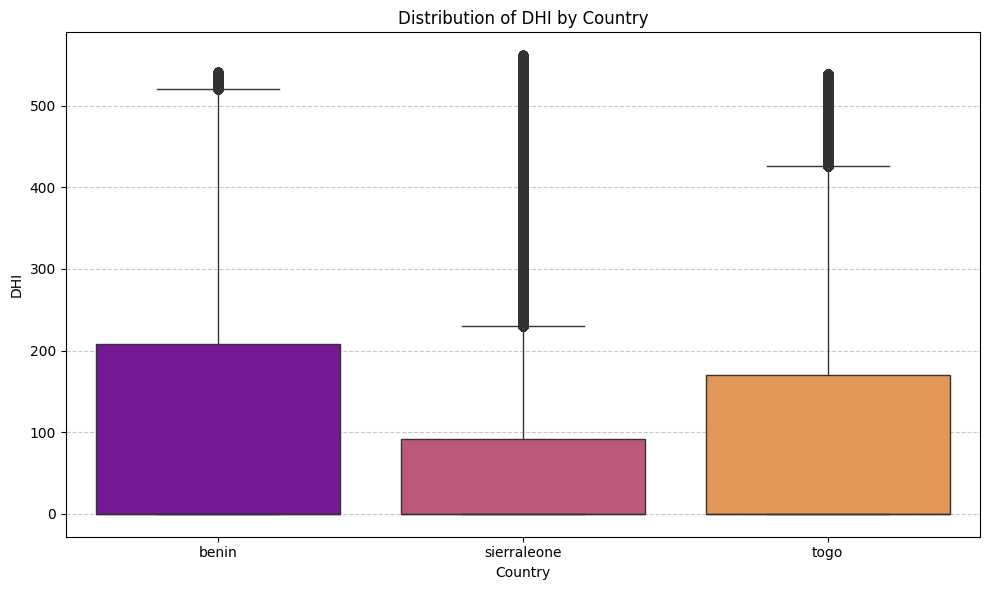


   Summary Table of GHI, DNI, DHI across Countries 


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
country,,,,,,,,,
benin,212.419792,0.0,308.144304,146.191450,0.0,238.776956,106.623922,0.0,146.921265
sierraleone,83.421828,0.0,153.211582,16.952186,0.0,49.715594,73.767669,0.0,133.422884
togo,156.933224,0.0,253.132094,86.801941,0.0,169.392646,96.485675,0.0,146.505398



   Bar Chart of Average GHI across Countries 


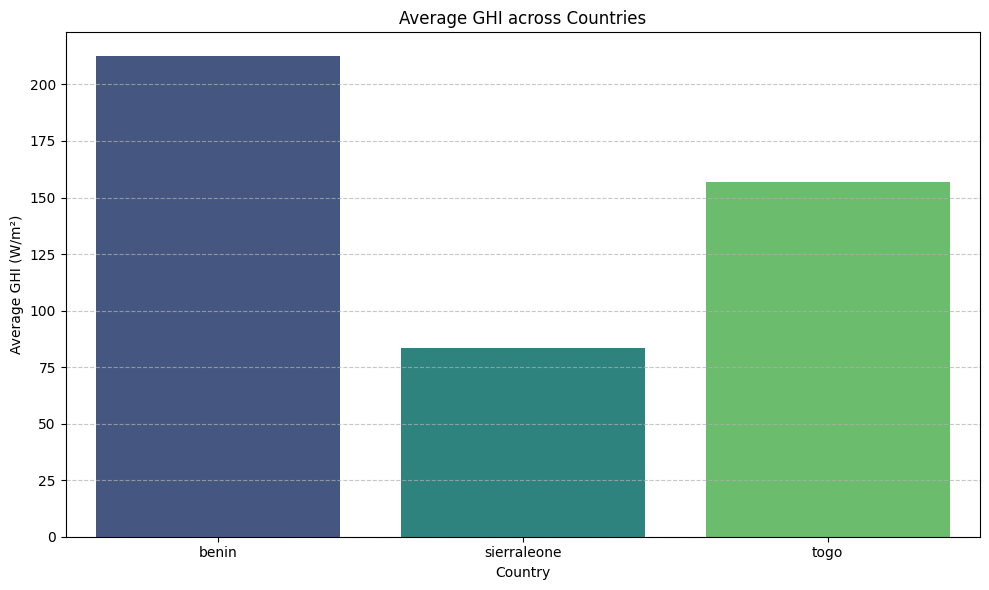

In [35]:
from IPython.display import display

print("    Metric Comparison Analysis")

#  Boxplots of GHI, DNI, DHI colored by country
print("\n   Boxplots of GHI, DNI, DHI by Country ")

metrics = ['GHI', 'DNI', 'DHI']
colors = ['viridis', 'magma', 'plasma'] 

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='country', y=metric, data=full_df, hue='country', palette=colors[i], legend=False)
    plt.title(f'Distribution of {metric} by Country')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#  Summary Table comparing mean, median, and standard deviation
print("\n   Summary Table of GHI, DNI, DHI across Countries ")

summary_table = full_df.groupby('country')[metrics].agg(['mean', 'median', 'std'])


summary_table.columns = ['_'.join(col).strip() for col in summary_table.columns.values]
summary_table.style.background_gradient(cmap='viridis')
display(summary_table)

#bar chart of average GHI of all countries
print("\n   Bar Chart of Average GHI across Countries ")
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_table.index, y='GHI_mean', data=summary_table, palette='viridis', hue='country')
plt.title('Average GHI across Countries')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Key Observations from Solar Irradiance Boxplots of the three countries

* **Benin** generally shows higher median GHI and DNI compared to Sierra Leone and Togo, indicating stronger overall and direct solar radiation. However, it also exhibits significant variability and high peaks across all three metrics.
* **Sierra Leone** consistently records the lowest median values for all three irradiance components (GHI, DNI, DHI), with DNI being notably close to zero for much of the time. Despite its low medians, it can experience high diffuse irradiance (DHI) at times, as indicated by its long upper whisker and outliers for DHI.
* **Togo** often falls between Benin and Sierra Leone in terms of median irradiance, but it is characterized by a wide range of values, particularly for DNI and GHI, with frequent occurrences of very high irradiance, as suggested by its long upper whiskers and numerous outliers.